In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from blendhunter.config import BHConfig
from blendhunter.performance import get_acc

In [2]:
bhconfig = BHConfig(config_file='../data/bhconfig.yml').config
out_path = bhconfig['out_path']
noise_sigma = bhconfig['noise_sigma']
n_noise_real = bhconfig['n_noise_real']

In [3]:
labels = np.load(os.path.join(out_path, 'bh_pad50/BlendHunterData/test/test/labels.npy')).flatten()

In [4]:
bh_mean, bh_std = get_acc('bh_pad_results', out_path, noise_sigma, n_noise_real, labels)
sep_mean, sep_std = get_acc('sep_pad_results', out_path, noise_sigma, n_noise_real, labels)

In [7]:
sep_mean

array([0., 0., 0., 0., 0., 0.])

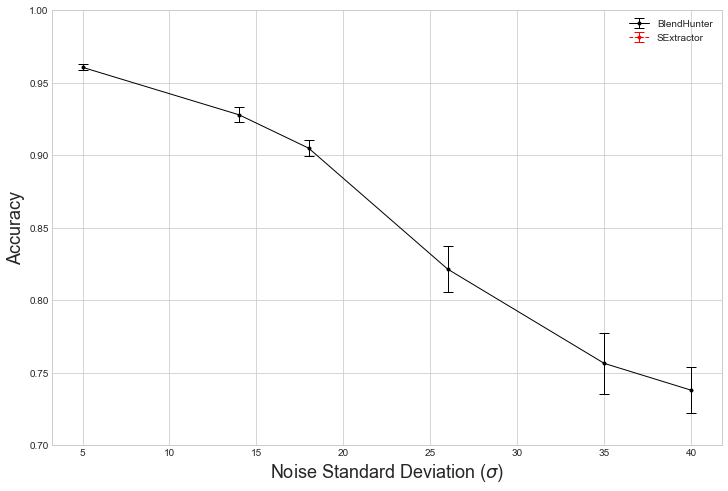

In [6]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(12, 8))
plt.errorbar(noise_sigma, bh_mean, yerr=bh_std, color='k', marker='.', linestyle='-', linewidth=1,
             capsize=5, label='BlendHunter')
plt.errorbar(noise_sigma, sep_mean, yerr=sep_std, color='red', marker='.', linestyle='--', linewidth=1,
             capsize=5, label='SExtractor')
plt.xlabel('Noise Standard Deviation ($\sigma$)', fontsize=18)
plt.ylabel('Accuracy', fontsize=18)
plt.ylim(0.7, 1)
plt.legend()
plt.show()